# Linearna regresija

### Ucitavanje biblioteka

In [9]:
%run preprocessing.ipynb

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

### Ucitavanje skupa podataka

In [15]:
data = preprocess_data(file_name = 'bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

Prvih 5 instanci skupa podataka pre sredjivanja:
     Timestamp  Open  High   Low  Close  Volume_(BTC)  Volume_(Currency)  \
0  1325317920  4.39  4.39  4.39   4.39      0.455581                2.0   
1  1325317980   NaN   NaN   NaN    NaN           NaN                NaN   
2  1325318040   NaN   NaN   NaN    NaN           NaN                NaN   
3  1325318100   NaN   NaN   NaN    NaN           NaN                NaN   
4  1325318160   NaN   NaN   NaN    NaN           NaN                NaN   

   Weighted_Price  
0            4.39  
1             NaN  
2             NaN  
3             NaN  
4             NaN  

Dimenzije skupa podataka pre sredjivanja:
 (4857377, 8)

Prvih 5 instanci skupa podataka nakon sredjivanja:
           Timestamp      Open      High       Low     Close  Volume_(BTC)  \
4854496  1616976000  55790.28  55822.98  55777.98  55804.36      1.731449   
4854497  1616976060  55822.98  55857.28  55822.98  55857.28      0.589603   
4854498  1616976120  55822.98  55829.0

In [16]:
data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date
4854496,1616976000,55790.28,55822.98,55777.98,55804.36,1.731449,96636.546983,55812.518695,2021-03-29
4854497,1616976060,55822.98,55857.28,55822.98,55857.28,0.589603,32931.781301,55854.182542,2021-03-29
4854498,1616976120,55822.98,55829.04,55766.15,55779.04,2.729659,152263.034630,55780.964698,2021-03-29
4854500,1616976240,55766.15,55768.63,55766.15,55768.63,0.023738,1323.776861,55766.455065,2021-03-29
4854501,1616976300,55770.46,55778.48,55736.83,55742.20,0.389067,21692.454676,55755.006032,2021-03-29
...,...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,2021-03-30
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,2021-03-30
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,2021-03-30
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202,2021-03-30


In [17]:
data.corr()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,1.000000,0.829068,0.825744,0.831882,0.829429,-0.096817,-0.089694,0.828750
Open,0.829068,1.000000,0.999613,0.999682,0.999272,0.048908,0.058470,0.999693
High,0.825744,0.999613,1.000000,0.999546,0.999694,0.058578,0.068162,0.999841
Low,0.831882,0.999682,0.999546,1.000000,0.999663,0.045069,0.054626,0.999832
Close,0.829429,0.999272,0.999694,0.999663,1.000000,0.053523,0.063089,0.999751
Volume_(BTC),-0.096817,0.048908,0.058578,0.045069,0.053523,1.000000,0.999794,0.052515
Volume_(Currency),-0.089694,0.058470,0.068162,0.054626,0.063089,0.999794,1.000000,0.062102
Weighted_Price,0.828750,0.999693,0.999841,0.999832,0.999751,0.052515,0.062102,1.000000


In [18]:
abs(data.corr())['Close'].sort_values(ascending=False)

Close                1.000000
Weighted_Price       0.999751
High                 0.999694
Low                  0.999663
Open                 0.999272
Timestamp            0.829429
Volume_(Currency)    0.063089
Volume_(BTC)         0.053523
Name: Close, dtype: float64

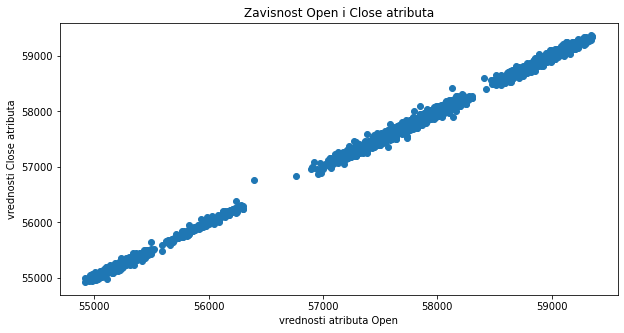

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(x=data['Open'], y=data['Close'])
plt.xlabel('vrednosti atributa Open')
plt.ylabel('vrednosti Close atributa')
plt.title('Zavisnost Open i Close atributa')
plt.show()

In [20]:
X = np.array(data['Open']).reshape(-1,1) # skup atributa
y = np.array(data['Close']).reshape(-1,1) # ciljna promenljiva koju treba predvideti

In [21]:
y

array([[55804.36],
       [55857.28],
       [55779.04],
       ...,
       [58723.84],
       [58760.59],
       [58778.18]])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

y_train = y_train.reshape(len(y_train),)
y_test = y_test.reshape(len(y_test),)

Intercept: 70.954
Coefficient: 0.999
MAE: 33.077


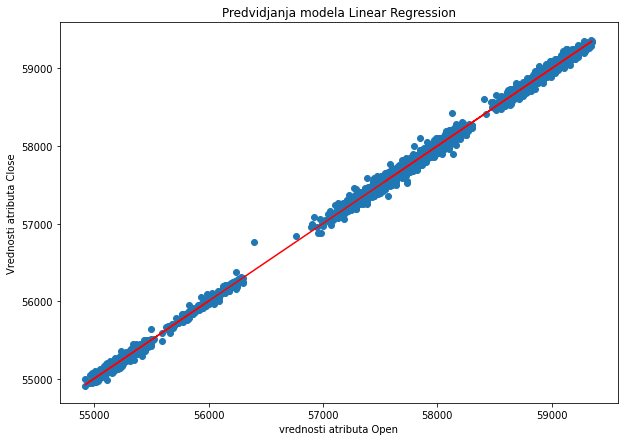

In [24]:
# Kreiranje i treniranje modela

lm = LinearRegression()
lm.fit(X_train, y_train)

print("Intercept: {:,.3f}".format(lm.intercept_))
print("Coefficient: {:,.3f}".format(lm.coef_[0]))

# Predvidjanje modela i racunanje MAE (srednje apsolutne greske)

mae = mean_absolute_error(y_test, lm.predict(X_test))
print("MAE: {:,.3f}".format(mae))

# Vizuelni prikaz rezultata

plt.figure(figsize=(10,7))
plt.scatter(x=data['Open'], y=data['Close'])
plt.plot(X_test, lm.predict(X_test), color='red')
plt.xlabel('vrednosti atributa Open')
plt.ylabel('Vrednosti atributa Close')
plt.title('Predvidjanja modela Linear Regression')
plt.show()